In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
orders = pd.read_csv('orders.csv')

In [4]:
orders

,id,order_date,ship_mode,customer_id,sales
0,100006,2014-09-07,Standard,DK-13375,377.970
1,100090,2014-07-08,Standard,EB-13705,699.192
2,100293,2014-03-14,Standard,NF-18475,91.056
3,100328,2014-01-28,Standard,JC-15340,3.928
4,100363,2014-04-08,Standard,JM-15655,21.376
...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368
5005,169320,2017-07-23,Second,LH-16900,171.430
5006,169488,2017-09-07,First,AA-10375,56.860
5007,169502,2017-08-28,Standard,MG-17650,113.410


In [5]:
cust = pd.read_csv('customers.csv')

In [6]:
cust

,id,name,segment,state,city
0,CG-12520,Claire Gute,Consumer,Kentucky,Henderson
1,DV-13045,Darrin Van Huff,Corporate,California,Los Angeles
2,SO-20335,Sean O'Donnell,Consumer,Florida,Fort Lauderdale
3,BH-11710,Brosina Hoffman,Consumer,California,Los Angeles
4,AA-10480,Andrew Allen,Consumer,North Carolina,Concord
...,...,...,...,...,...
788,CJ-11875,Carl Jackson,Corporate,Pennsylvania,Philadelphia
789,RS-19870,Roy Skaria,Home Office,Iowa,Burlington
790,SC-20845,Sung Chung,Consumer,Illinois,Arlington Heights
791,RE-19405,Ricardo Emerson,Consumer,Ohio,Kent


In [7]:
orders['order_date'] = pd.to_datetime(orders['order_date'], infer_datetime_format=True)

In [8]:
orders['order_month'] = orders['order_date'].dt.strftime('%Y-%m') 

In [9]:
orders

,id,order_date,ship_mode,customer_id,sales,order_month
0,100006,2014-09-07,Standard,DK-13375,377.970,2014-09
1,100090,2014-07-08,Standard,EB-13705,699.192,2014-07
2,100293,2014-03-14,Standard,NF-18475,91.056,2014-03
3,100328,2014-01-28,Standard,JC-15340,3.928,2014-01
4,100363,2014-04-08,Standard,JM-15655,21.376,2014-04
...,...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368,2017-11
5005,169320,2017-07-23,Second,LH-16900,171.430,2017-07
5006,169488,2017-09-07,First,AA-10375,56.860,2017-09
5007,169502,2017-08-28,Standard,MG-17650,113.410,2017-08


In [10]:
cohorts= orders.groupby('customer_id',as_index=False)['order_month'].min()
cohorts.rename(columns = {'order_month':'Cohort'},inplace=True)
cohorts

,customer_id,Cohort
0,AA-10315,2014-03
1,AA-10375,2014-04
2,AA-10480,2014-05
3,AA-10645,2014-06
4,AB-10015,2014-02
...,...,...
788,XP-21865,2014-01
789,YC-21895,2014-11
790,YS-21880,2015-01
791,ZC-21910,2014-10


In [11]:
df_merged= pd.merge(orders,cohorts , how='left', on='customer_id')
df_merged

,id,order_date,ship_mode,customer_id,sales,order_month,Cohort
0,100006,2014-09-07,Standard,DK-13375,377.970,2014-09,2014-09
1,100090,2014-07-08,Standard,EB-13705,699.192,2014-07,2014-07
2,100293,2014-03-14,Standard,NF-18475,91.056,2014-03,2014-03
3,100328,2014-01-28,Standard,JC-15340,3.928,2014-01,2014-01
4,100363,2014-04-08,Standard,JM-15655,21.376,2014-04,2014-04
...,...,...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368,2017-11,2014-01
5005,169320,2017-07-23,Second,LH-16900,171.430,2017-07,2014-08
5006,169488,2017-09-07,First,AA-10375,56.860,2017-09,2014-04
5007,169502,2017-08-28,Standard,MG-17650,113.410,2017-08,2014-08


In [12]:
def cohort_period(df):
    """
    Creates column CohortPeriod
    """
    df['CohortPeriod'] = np.arange(len(df))
    return df

In [13]:
cohorts_group = df_merged.groupby(['Cohort', 'order_month']).agg({'customer_id': pd.Series.nunique})
cohorts_group.rename(columns={'customer_id': 'TotalUsers',
                        'id': 'TotalOrders'}, inplace=True)
cohorts_group = cohorts_group.groupby(level=0).apply(cohort_period)
cohorts_group.reset_index(inplace=True)
cohorts_group.set_index(['Cohort', 'CohortPeriod'], inplace=True) 
cohort_group_size = cohorts_group['TotalUsers'].groupby(level=0).first()
user_retention = cohorts_group['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

In [14]:
user_retention.T

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
Cohort,,,,,,,,,,,,,,,,,,,,,
2014-01,1.0,0.093750,0.062500,0.062500,0.062500,0.125000,0.156250,0.093750,0.218750,0.156250,...,0.125000,0.156250,0.125000,0.031250,0.062500,0.281250,0.281250,0.312500,0.187500,NaN
2014-02,1.0,0.166667,0.083333,0.041667,0.083333,0.083333,0.125000,0.125000,0.166667,0.166667,...,0.208333,0.125000,0.125000,0.166667,0.250000,0.250000,0.125000,NaN,NaN,NaN
2014-03,1.0,0.061538,0.030769,0.123077,0.107692,0.107692,0.076923,0.123077,0.092308,0.015385,...,0.092308,0.184615,0.200000,0.153846,0.184615,0.092308,0.292308,0.123077,0.276923,0.246154
2014-04,1.0,0.107143,0.035714,0.071429,0.053571,0.142857,0.107143,0.160714,0.142857,0.017857,...,0.250000,0.053571,0.196429,0.089286,0.125000,0.142857,0.267857,0.142857,0.250000,0.250000
2014-05,1.0,0.089286,0.089286,0.071429,0.178571,0.035714,0.214286,0.178571,0.071429,0.053571,...,0.089286,0.071429,0.196429,0.125000,0.107143,0.285714,0.125000,0.303571,0.160714,NaN
2014-06,1.0,0.020833,0.041667,0.083333,0.041667,0.187500,0.166667,0.020833,0.083333,0.125000,...,0.187500,0.187500,0.104167,0.062500,0.270833,0.145833,0.291667,0.229167,NaN,NaN
2014-07,1.0,0.136364,0.113636,0.113636,0.181818,0.045455,0.181818,0.045455,0.159091,0.159091,...,0.250000,0.227273,0.295455,0.204545,NaN,NaN,NaN,NaN,NaN,NaN
2014-08,1.0,0.163265,0.061224,0.224490,0.102041,0.061224,0.081633,0.040816,0.081633,0.061224,...,0.183673,0.163265,0.183673,0.244898,0.224490,0.204082,NaN,NaN,NaN,NaN
2014-09,1.0,0.132353,0.132353,0.161765,0.014706,0.029412,0.132353,0.147059,0.132353,0.029412,...,0.132353,0.220588,0.147059,0.235294,0.176471,NaN,NaN,NaN,NaN,NaN


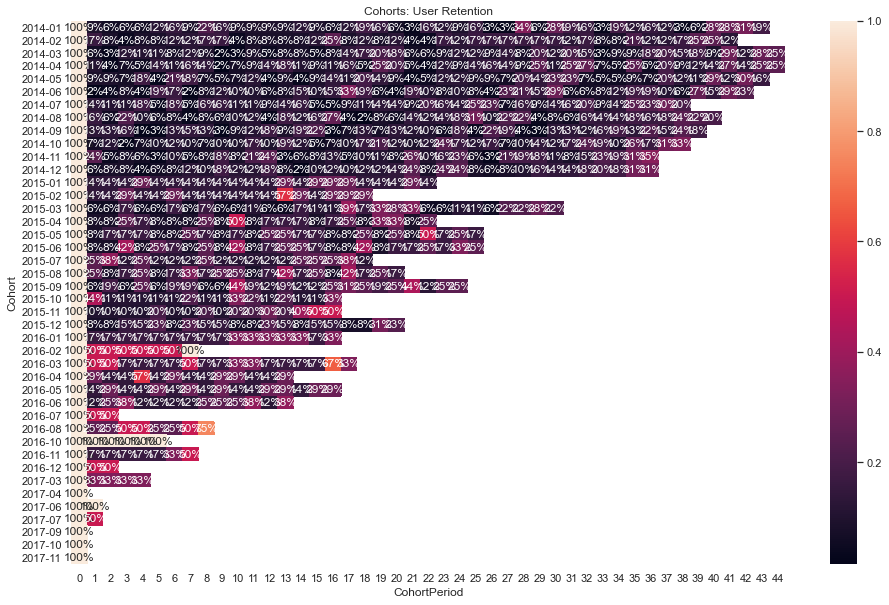

In [15]:
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

In [16]:
cohorts.sort_values('Cohort', ascending=False)

,customer_id,Cohort
140,CD-12280,2017-11
403,JR-15700,2017-10
593,PH-18790,2017-10
742,TC-21145,2017-09
345,JC-15385,2017-07
...,...,...
720,SV-20365,2014-01
544,MV-17485,2014-01
545,MV-18190,2014-01
175,CS-12250,2014-01


In [17]:
cohorts.groupby('Cohort').count()['customer_id']

Cohort
2014-01    32
2014-02    24
2014-03    65
2014-04    56
2014-05    56
2014-06    48
2014-07    44
2014-08    49
2014-09    68
2014-10    42
2014-11    62
2014-12    49
2015-01     7
2015-02     7
2015-03    18
2015-04    12
2015-05    12
2015-06    12
2015-07     8
2015-08    12
2015-09    16
2015-10     9
2015-11    10
2015-12    13
2016-01     6
2016-02     2
2016-03     6
2016-04     7
2016-05     7
2016-06     8
2016-07     2
2016-08     4
2016-10     1
2016-11     6
2016-12     2
2017-03     3
2017-04     1
2017-06     1
2017-07     2
2017-09     1
2017-10     2
2017-11     1
Name: customer_id, dtype: int64

В последние месяцы почти никто из новых не возвращается, т.к. новых клиентов почти нет, поэтому посмотрим на общее число клиентов. 

In [18]:
df_merged[
    df_merged['order_month'] == '2017-11'
].groupby('customer_id').count()

,id,order_date,ship_mode,sales,order_month,Cohort
customer_id,,,,,,
AA-10645,1,1,1,1,1,1
AB-10060,2,2,2,2,2,2
AB-10105,1,1,1,1,1,1
AB-10150,1,1,1,1,1,1
AB-10600,1,1,1,1,1,1
...,...,...,...,...,...,...
VP-21730,1,1,1,1,1,1
VW-21775,1,1,1,1,1,1
WB-21850,1,1,1,1,1,1


In [19]:
df_merged[
    df_merged['order_month'] == '2016-11'
].groupby('customer_id').count()

,id,order_date,ship_mode,sales,order_month,Cohort
customer_id,,,,,,
AA-10375,1,1,1,1,1,1
AB-10015,1,1,1,1,1,1
AC-10450,1,1,1,1,1,1
AF-10885,1,1,1,1,1,1
AG-10390,1,1,1,1,1,1
...,...,...,...,...,...,...
TS-21430,1,1,1,1,1,1
TT-21220,1,1,1,1,1,1
TT-21265,1,1,1,1,1,1


In [21]:
df_merged[
    df_merged['order_month'] == '2017-10'
].groupby('customer_id').count()

,id,order_date,ship_mode,sales,order_month,Cohort
customer_id,,,,,,
AC-10450,1,1,1,1,1,1
AG-10495,1,1,1,1,1,1
AG-10765,1,1,1,1,1,1
AH-10075,1,1,1,1,1,1
AH-10120,1,1,1,1,1,1
...,...,...,...,...,...,...
TS-21370,1,1,1,1,1,1
TS-21610,1,1,1,1,1,1
TW-21025,1,1,1,1,1,1


In [22]:
df_merged[
    df_merged['order_month'] == '2016-10'
].groupby('customer_id').count()

,id,order_date,ship_mode,sales,order_month,Cohort
customer_id,,,,,,
AB-10255,1,1,1,1,1,1
AG-10495,1,1,1,1,1,1
AH-10690,1,1,1,1,1,1
AP-10720,1,1,1,1,1,1
AS-10285,1,1,1,1,1,1
...,...,...,...,...,...,...
TP-21565,1,1,1,1,1,1
TT-21265,1,1,1,1,1,1
VB-21745,1,1,1,1,1,1


In [23]:
df_merged[
    df_merged['order_month'] == '2017-09'
].groupby('customer_id').count()

,id,order_date,ship_mode,sales,order_month,Cohort
customer_id,,,,,,
AA-10375,1,1,1,1,1,1
AB-10060,1,1,1,1,1,1
AB-10105,1,1,1,1,1,1
AB-10150,1,1,1,1,1,1
AB-10165,1,1,1,1,1,1
...,...,...,...,...,...,...
TH-21235,1,1,1,1,1,1
TM-21010,1,1,1,1,1,1
TP-21415,1,1,1,1,1,1


In [24]:
df_merged[
    df_merged['order_month'] == '2016-09'
].groupby('customer_id').count()

,id,order_date,ship_mode,sales,order_month,Cohort
customer_id,,,,,,
AA-10645,1,1,1,1,1,1
AB-10060,1,1,1,1,1,1
AB-10105,1,1,1,1,1,1
AC-10450,1,1,1,1,1,1
AC-10660,1,1,1,1,1,1
...,...,...,...,...,...,...
TR-21325,2,2,2,2,2,2
TS-21505,1,1,1,1,1,1
TS-21610,2,2,2,2,2,2


В конце 2017 года число покупателей больше, чем в конце 2016, но низкий прирост новых клиентов. Часть клиентов вернулась, но прироста почти нет. Часть средних и малых когорт потеряли активность в 2017 году, но из-за вернувшихся людей в больших когортах общее число активных клиентов в последние 3 месяца 2017 года больше, чем в последние 3 месяца 2016 года.